### Download the plots from WandB as CSV files.

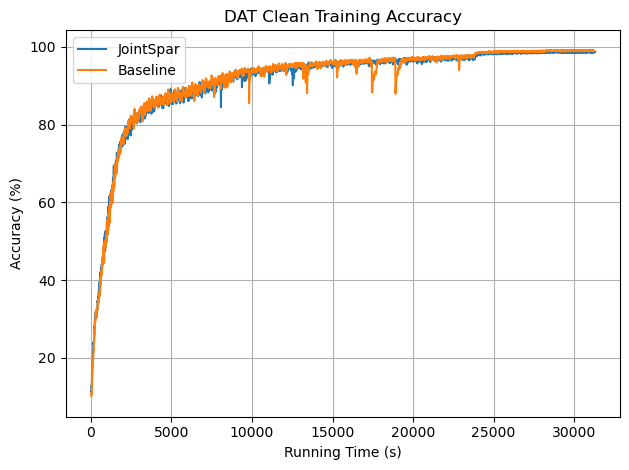

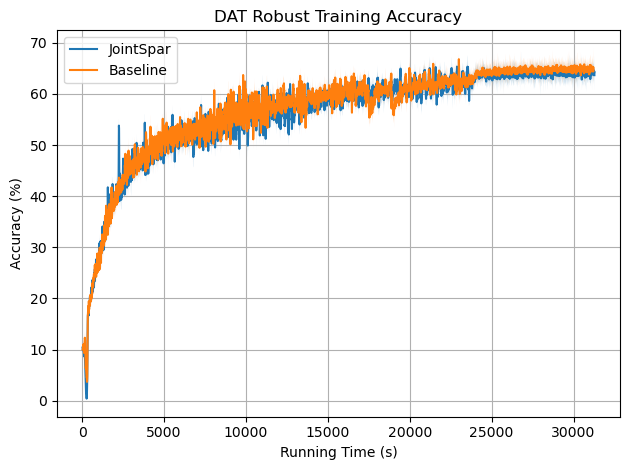

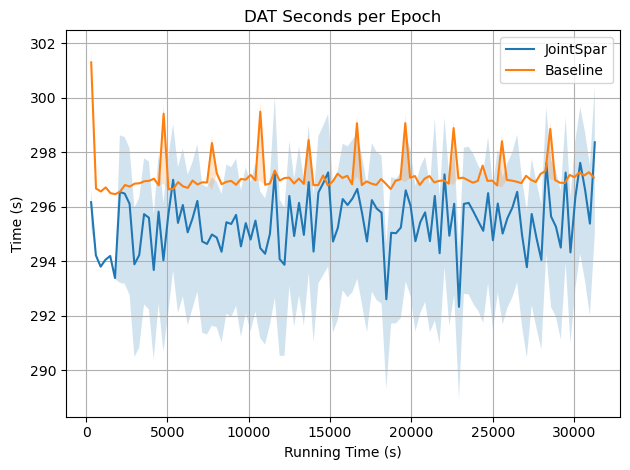

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 10000)

def plot_data(file, group_name='JOINTSPAR', index='Relative Time (Process)', xlabel='Running Time (s)', ylabel='', title='Plot'):
    df = pd.read_csv(file)
    df = df.set_index(index)
    #Remove step columns
    step_columns = [column for column in df.columns if 'step' in column]
    df = df.drop(step_columns, axis=1)
    
    #Separate group and not group columns
    group = [group_name in column for column in df.columns]
    not_group = [not in_group for in_group in group]
    df_group = df.loc[: , group]
    df_not_group = df.loc[: , not_group]

    def plot_group(df, ax, group_name):
        min_columns = [column for column in df.columns if '__MIN' in column]
        max_columns = [column for column in df.columns if '__MAX' in column]
        mean_columns = [column for column in df.columns if not('__MIN' in column or '__MAX' in column)]

        def process_column(df_metric):
            df_warmup = df_metric.iloc[:, 1].dropna()
            df_training = df_metric.iloc[:, 0].dropna()
            return pd.concat([df_warmup, df_training], axis=0)

        df_min = process_column(df.loc[: , min_columns])
        df_max = process_column(df.loc[: , max_columns])
        df_mean = process_column(df.loc[: , mean_columns])

        index_plot = [df_mean.index[i:i+8].values.mean() for i in np.arange(0, len(df_mean), 8)]
        mean_plot = [df_mean.iloc[i:i+8].mean() for i in np.arange(0, len(df_mean), 8)]
        min_plot = [df_min.iloc[i:i+8].min() for i in np.arange(0, len(df_min), 8)]
        max_plot = [df_max.iloc[i:i+8].max() for i in np.arange(0, len(df_max), 8)]

        ax.plot(index_plot, mean_plot, label=group_name)
        ax.fill_between(x=index_plot, y1=min_plot, y2=max_plot, alpha=0.2)
        
    #Merge Training and Warmup
    fig, ax = plt.subplots()
    plot_group(df_group, ax, 'JointSpar')
    plot_group(df_not_group, ax, 'Baseline')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid()
    plt.tight_layout()
    plt.show()

fig, ax = plt.subplots()
plot_data('./data/wandb_export_clean_training_accuracy.csv', ylabel='Accuracy (%)', title='DAT Clean Training Accuracy', ax=ax)
plot_data('./data/wandb_export_robust_training_accuracy.csv', ylabel='Accuracy (%)', title='DAT Robust Training Accuracy', ax=ax)
plot_data('./data/wandb_export_time_per_epoch.csv', ylabel='Time (s)', title='DAT Seconds per Epoch')